In [1]:
import unicodecsv
# There is also a library csv and it also has an attribute DictReader
# am not sure, but it looks like, every field and values are preceded by
# 'u' in unicode
enrollments =[] #we want a list of dictionaries so define an empty list
with open('enrollments.csv') as f:
    reader = unicodecsv.DictReader(f)
    # So when we read a file using DictReader every line in the
    # file is stored in a dictionary
    for row in reader:
        enrollments.append(row)
enrollments[0] # We can see below, enrollment is a list of dictionary

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [2]:
import unicodecsv
daily_engagement =[]
with open('daily_engagement.csv') as f:
    reader = unicodecsv.DictReader(f)
    for row in reader:
        daily_engagement.append(row)
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': u'0.0',
 u'num_courses_visited': u'1.0',
 u'projects_completed': u'0.0',
 u'total_minutes_visited': u'11.6793745',
 u'utc_date': u'2015-01-09'}

In [3]:
import unicodecsv
project_submissions =[]
with open('project_submissions.csv') as f:
    reader = unicodecsv.DictReader(f)
    for row in reader:
        project_submissions.append(row)
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': u'2015-01-16',
 u'creation_date': u'2015-01-14',
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

### For simplicity
we can create a function that take file's name as the argument and read the content


In [4]:
import unicodecsv

#however there exists function w same name in pandas

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

In [5]:
#For better visibility of variables and values
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [6]:
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': u'0.0',
 u'num_courses_visited': u'1.0',
 u'projects_completed': u'0.0',
 u'total_minutes_visited': u'11.6793745',
 u'utc_date': u'2015-01-09'}

In [7]:
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': u'2015-01-16',
 u'creation_date': u'2015-01-14',
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Fixing the data type
As we can see that all the values in the record are strings, be it numeric, boolean or date.
So we should change these data type from string to the data type it should be. Further, 'lessons_completed' is a string of float, but, such number must be an integer to make sense.

In [8]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    ## Will return a boolean value
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [9]:
# Change the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [10]:
# Change the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Ask yourself, what are right questions
We may like to know how much time does it takes to complete a project?
How does the students who successfully complete projects differ from students who do not in terms of engagement time, lessons completions?

## Investigate the data
Try to discover inconsistencies and problems in the data

In each of three datasets we can see, there are multiple rows for certain account_keys. So we must know, how many active account_key/students are there in each of these tables.

In [11]:
a=[1,2,1,2,3,4,4,4,5]
print len(a)
b = set(a)
print b
print len(b)

9
set([1, 2, 3, 4, 5])
5


In [12]:
#To find the no of rows/records in the dataset
#for a list/set afterall, we can use len()

#Create a set, which contains the unique values
#of the account key

#here we can't do set(enrollments) bcoz enrollments
#is not a simple list,but list of dicts

print(len(enrollments))

unique_enrolled_students = set()
for enrollment in enrollments:
    #enrollment is a dictionary
    unique_enrolled_students.add(enrollment['account_key'])
    #add() only adds unique elements
print(len(unique_enrolled_students))

1640
1302


In [13]:
print(len(daily_engagement))

unique_engagement_students = set()
for engagement_record in daily_engagement:
    unique_engagement_students.add(engagement_record['acct'])
print(len(unique_engagement_students))


136240
1237


In [14]:
print(len(project_submissions))

unique_project_submitters = set()
for submission in project_submissions:
    unique_project_submitters.add(submission['account_key'])
print(len(unique_project_submitters))

3642
743


We can notice that same varible has been depicted by different name 'acct' in the daily_engagement table. Further, few students are highly engaged that the others. Also the no of unique students in the enrollmengt and engagement tables are different. Do students get enrolled, but do not engage or may be they cancell the enrollment?

In [15]:
## To make the names of the variables consistent
# we can also create a new key 'account_key' and transfer the values of 'acct' and delete 'acct' key

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]
daily_engagement[0]



{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [16]:
# lets find any account_key that is enrolled, but not engaged. 
# unique_engagement_students is a set of values (unique) account_key for
# students who are engaged
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


We can see that for this student the 'join_date' and 'cancel_date' is same and 'days_to-cancel' is zero. 

Let's check for more problem students. By that I mean, students who did not enroll and cancel on the same day, yet they are not engaging with the lessons.

In [17]:
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
        print enrollment
        num_problem_students += 1

num_problem_students


{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

So there are only 3 such students. Further, we noticed that these are all 'is udacity' : True, that means these are test accounts, and they are not guaranteed to be present in the daily engagement table.
So, we came across a new issue. However, we must get rid of these test accounts.

In [18]:
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])

print(udacity_test_accounts)
len(udacity_test_accounts)

set([u'1304', u'1069', u'448', u'312', u'818', u'1101'])


6

In [19]:
#we can also try to find,how many times were they enrolled
#lets create a list
test_account_list=[]
for enrollment in enrollments:
    if enrollment['is_udacity']:
        test_account_list.append(enrollment['account_key'])
print test_account_list
len(test_account_list)

[u'448', u'448', u'448', u'448', u'448', u'448', u'448', u'448', u'448', u'1304', u'1304', u'312', u'312', u'312', u'312', u'818', u'1069', u'1101']


18

In [20]:
#lets create a function that takes the existing table/data as 
#argument and return a table/data that doesn't have udacity 
#test accounts.
#since existing data is in the form of a list of dicts
#we shall create similar list with non-udacity students

def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

#so non_udacity_WHATEVER will be a list with non-unique
#account keys like the original lists

In [21]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))


1622
135656
3634


## Explorations phase
Lets we want to know, how do the numbers in the daily engagement table differ for students who passed the first project?
Problems:
1. In daily engagement table, there is data for all engagements, including that after the the submission of first project. However, that data is not relevant for the current analysis. Because, we want the engagement data just before the submission of first project.
2. Also, there will be students who submit the first project in 5,10,20,50 days after the join_date/enrollment. So,we must not compare engagement data over different length of time. 
3. Since, the daily engagement table we have been using includes enagagement numbers for the entire nano-degree program. It includes the engagement for the courses that are not related to the first project, which is little weird. 

(If you did want to look into engagement data in only the first course of the nano degree, you could do that using the daily engagement full table avialable in the download section, which includes the breakdown by the courses as well. But, since this file is pretty big, computation might take long time.)

Revision: So we shall look only at the engagement data:
1. Before submission of first project.
2. Only the first week data.
3. Exculde who cancelled within first 7 days/trial period.
 
To begin with, we will create a dictionary of students, who have either:
1. not cancelled yet (who are within the first week after enrollment) or :POTENTIAL PERMANENT STUDENT
2. stayed enrolled for more than seven days :PERMANENT STUDENT
`keys`: account_key; `values`: enrollment_date (this date will be useful later to find engagement records during the first week)
Name of dictionary: `paid_students`

How many students are there in the dictionary?

In [22]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
        # not + False = True
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or       
            #if the account_key is not in the new dictnry
             enrollment_date > paid_students[account_key]): 
            #this student's account key is in the paid_students dict
            #But students may enroll multiple times and cancel
            #these students paid fees and then canclled and again enrlled
            #and for the current iteration they have either spent more
            #than 7 days(and paid) or have not canceled(spent<7 days)
            #we put a condition if account_key is already present
            #in the paid-stdnt dictnry and enrollment_date of current
            #iteration is later than the existing enrollment date
            #latest enrollment date will be count
            paid_students[account_key] = enrollment_date

#so no of paid or potential to be paid student is:
len(paid_students)

995

## Getting data from the first week

In [23]:
# Now as we know who the paid students(account_key) are,we will
# find the rows/record of engagement of these paid student in
# the first week after enrollment/join date and make a list of such rows.

#lets create a function that takes join_date and engagement date
#and tells wether engagement took place within the 1st week

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return (time_delta.days < 7 and time_delta.days >=0)

In [24]:
#Now we have the dictionary of paid_students with key as the
#account key and values as enrollment date, we will create a function 
#to cherry pick only the rows from a table where, account key
#belongs to a paid student and return a list of dicts of such students

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)



1293
134549
3618


In [25]:
## We just added a new field 'has_visited' as need arose later down the analysis:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [26]:
#lets create list of dicts, which has only those
#dicts that have account_keys that are paid students
#and they engaged in the first week

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    #paid_students is a free hanging dictionary
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        #the expression after if statement is a function that
        #will yield a boolean value
         paid_engagement_in_first_week.append(engagement_record)

print(paid_engagement_in_first_week[0])
len(paid_engagement_in_first_week)

{u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


6919

## Exploring student engagement

One thing I wud like to look at is the average number of minutes students spend in the classroom during their first week. 
Right now I have a bunch of engagement records for different students, and they're not in any particular order. 
First, I'd like to separate out the engagement records into groups where each group contains all the engagement records for a particular student.
I'll represent these groups using a dictionary where the keys are student account keys and the values are lists of engagement records for that student. So this is a dictionary of lists. Next, I'll compute the total number of minutes spent in the classroom by each student by summing up the number of minutes in each engagement record for that student. 
Finally, I'll compute the average of the totals to get the answer I'm looking for.


If I ever try to look up a key in the dictionary and
that key is not there, I'll get the empty list instead.

You'll see how this can be helpful in a minute. Then I looped through each engagement record and saved the account key in this variable.
Next I looked up the list of engagement records for that account key.

Here's where the defaultdict that comes in handy if I had never
added that account key yet, then I get the empty list. Then I append this engagement record to the list of engagement records for that account key.
Next I wanted to add up the number of minutes visited by each account and I decided to save that in this dictionary.
So this dictionary will store a number for each account key,
instead of a list of engagement records.Next I looped over the dictionary I created previously.
And by looping over the .items, I got both the key and the value for
each entry in the dictionary.
For each account, the number of minutes starts at 0.
Next I loop over each engagement record in the list of engagement records for that student.
And I add the number of minutes that
student visited in that engagement



In [27]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

engagement_by_account = defaultdict(list)
#default dict allows you to chose a type of dictnry here we have chosen a
#dictionary of lists If I ever try to look up a key in the dictionary and
#that key is not there, I'll get the empty list instead.

for engagement_record in paid_engagement_in_first_week:
    #paid_engagement_in_first_week is a list of dict and 
    #engagement_record is a dict
    account_key = engagement_record['account_key']
    #this is the value of account key
    engagement_by_account[account_key].append(engagement_record)
    #engagement_by_account[account_key] will give the list of engagement record
    #for that account key. Now is when defaultdict come in handy, if I have 
    # not added that account key yet I will get an empty list, then I will
    #append this engagement record to the list of engagement record for that
    # account key

engagement_by_account['15']
#So practically, engagement_by_accounts is a dictionary of list1
#where list1 is a another list of dictionary(engagement_record)
#{'x':[{},{},{}...], 'y':[{},{}....], 'z':[{},{},{}....]}
#a complex structure indeed

[{'account_key': u'15',
  'has_visited': 1,
  u'lessons_completed': 1,
  u'num_courses_visited': 4,
  u'projects_completed': 0,
  u'total_minutes_visited': 172.709897334,
  u'utc_date': datetime.datetime(2015, 3, 4, 0, 0)},
 {'account_key': u'15',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 108.647330667,
  u'utc_date': datetime.datetime(2015, 3, 5, 0, 0)},
 {'account_key': u'15',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 128.439285667,
  u'utc_date': datetime.datetime(2015, 3, 6, 0, 0)},
 {'account_key': u'15',
  'has_visited': 0,
  u'lessons_completed': 0,
  u'num_courses_visited': 0,
  u'projects_completed': 0,
  u'total_minutes_visited': 0.0,
  u'utc_date': datetime.datetime(2015, 3, 7, 0, 0)},
 {'account_key': u'15',
  'has_visited': 0,
  u'lessons_completed': 0,
  u'num_courses_visited': 0,
  u'projects_c

In [28]:
#A minor concept
d = {'a':1,'b':2,'c':3}
print d
print list(d)
print d.keys()
print d.values()
print d.items()

{'a': 1, 'c': 3, 'b': 2}
['a', 'c', 'b']
['a', 'c', 'b']
[1, 3, 2]
[('a', 1), ('c', 3), ('b', 2)]


In [30]:
# Create a dictionary with The keys as account keys, 
# and the values are numbers (total minutes of engagement)
total_minutes_by_account = {}
#when we loop over a dictnry as dict_name.items(), we get both the key
#and value for each entry in the dictnry
#engagement_for_student is a list
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        #engagement_record is a dictnry in which
        #total_minutes_visited is a key
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes
    
total_minutes_by_account.values()[0:2]
#total_minutes_by_account.values() of which we have extracted 
#the 1st two elements

[1482.9020456663002, 129.85920366667]

In [30]:
import numpy as np

#total_minutes_by_account.values() is a list of values for  
#each key in the dictnry total_minutes_by_account
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

#Pythin also has these inbuilt min,max..functions we cud
#have used, but we used numpy library, why??
#we will learn later

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [31]:
## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes

3564.7332644989997

In [32]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

# Alternatively, you can find the account key with the maximum minutes using this shorthand notation:

# max(total_minutes_by_account.items(), key=lambda pair: pair[1])

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163

We got a huge no of engagement record, it should have not been more than 7, at max one for each day.
The function we used:


`def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7`

we checked engagement date comes within 7 days after the join date, we are not checking whether engagement 
date actually came after the join date. So for students who enroll once and then cancel and then enroll again later, everything from first enrollment will count as their first week. To fix this, I checked that atleast 0 day pass from the join date to the engagement date. That way I am only considering data from the most recent enrollment. 
I modified the within_one_week function.

`def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0`
    
I re-ran the cell and the cells after it.    


In [33]:
#Now we get a max min of 3564 instead of above 10k that was impossible.
# and exactly seven number of engagement record.

#Next try to analyse no of lessons completed rather than the no of minutes devoted.
## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

#Function to group the records by account key
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')
##engagement_by_account is dictionary of lists where key is 
#account_key and value is a list of dictionaries (paid_engage-
#ment_in_first_week) in whic each dictionary has many keys
#and respective values

In [34]:
#Function to sum-up all entries for each account_key
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account,
                                             'total_minutes_visited')
#total_minutes_by_account is a dictnry with key as account_key
#and values as total_minutes_visited

In [35]:
#Function to print summary statistics
#Create a function that takes a dictionary as an
#argument and find stats for values in the dictnry
import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

describe_data(total_minutes_by_account.values())


Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [36]:
#Then she called the functions she created to analyze the lessons completed in the first week as follows:

lessons_completed_by_account = sum_grouped_items(engagement_by_account,
                                                 'lessons_completed')
describe_data(lessons_completed_by_account.values())



Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

Now I could do the same thing for num_course_visited field that I did for the other two field.
That is group the record by the account key and then sum-up the num_course_visited field for each
account key. But, It may be problematic, suppose one student visited 3 courses on day1, 0 on day2 
and 1 on day3, then total for this student will be 4, but that is not equal to the no of days the
student visited the classroom at all, which is 2. Also, we don't know the number of unique courses
the student visited, it may be 3 0r 4.

`So, instead we will analyse the total no of days each student visited the classroom, regardless of
howmany courses they visited that day.`
1. We can change the sum_grouped_item functions or
2. Create a new similar function that instaed of adding each no up, adds the total no records when 
 the no of record is greater than zero. Alternatively, we could create a new field in the data called
 'has_visited' that is either 1 or 0, depending on yes or no for a certain day.

Add the following code to the paid_engagement_table after we removed the free trial cancel, 
but, before we separated out engagement data for the first week.

`for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0`
        
Then, after recreating the engagement_by_account dictionary with the updated data, we ran the following code
to analyze days visited in the first week:

`days_visited_by_account = sum_grouped_items(engagement_by_account,'has_visited')
 describe_data(days_visited_by_account.values())`

In [37]:
days_visited_by_account = sum_grouped_items(engagement_by_account,
                                            'has_visited')
describe_data(days_visited_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [41]:
## first of all we shall create a set() of paid_submissions who passed the 
## subway project at some point of time, not necessarily first week. 
## Then refering this set, we shall split all the students in the 
## paid_engagement_in_first_week (a list of dicts) into two groups
## engagements that led students to pass the project
## engagements that didn't led students to pass the project


subway_project_lesson_keys = ['746169184', '3176718735']

##Either of the two keys can let pass the project
#as key was updated at some point of time

pass_subway_project = set()
#set of students who passed the subway project at some point

#paid_submission is a list of dictinries and submission is a list

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

print len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(paid_engagement_in_first_week)
print len(passing_engagement)
print len(non_passing_engagement)

647
6919
4527
2392


## Comparing the Two Student Groups

Compute some metrics you're interested in and see how they differ for students who pass the subway project vs. students who don't. A good starting point would be the metrics we looked at earlier (minutes spent in the classroom, lessons completed, and days visited).

In [42]:
passing_engagement_by_account = group_data(passing_engagement,
                                           'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,
                                               'account_key')
#####################################
### Compare total_minutes_visited
#####################################
print 'non-passing students:'
non_passing_minutes = sum_grouped_items(
    non_passing_engagement_by_account,
    'total_minutes_visited' )

describe_data(non_passing_minutes.values())

print 'passing students:'
passing_minutes = sum_grouped_items(
    passing_engagement_by_account,
    'total_minutes_visited' )

describe_data(passing_minutes.values())

########################################
### Compare lessons_completed
########################################

print 'non-passing students:'
non_passing_lessons = sum_grouped_items(
    non_passing_engagement_by_account,
    'lessons_completed')

describe_data(non_passing_lessons.values())

print 'passing students:'
passing_lessons = sum_grouped_items(
    passing_engagement_by_account,
    'lessons_completed' )

describe_data(passing_lessons.values())

#########################################
### Compare no of days visited
#########################################

print 'non-passing students:'
non_passing_visits = sum_grouped_items(
    non_passing_engagement_by_account, 
    'has_visited' )

describe_data(non_passing_visits.values())

print 'passing students:'
passing_visits = sum_grouped_items(
    passing_engagement_by_account,
    'has_visited' )

describe_data(passing_visits.values())

non-passing students:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
passing students:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
non-passing students:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27
passing students:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
non-passing students:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7
passing students:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


## Making Histograms

The line %matplotlib inline is specifically for IPython notebook, and causes your plots to appear in your notebook rather than a new window. If you are not using IPython notebook, you should not include this line, and instead you should add the line plt.show() at the bottom to show the plot in a new window.


Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


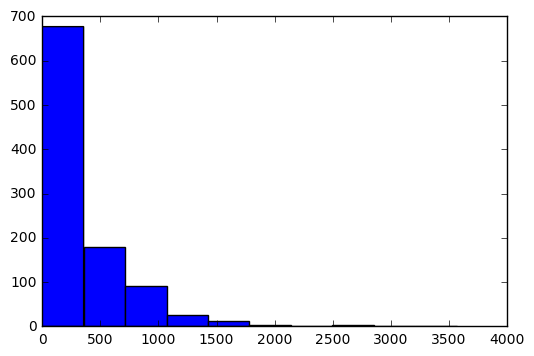

In [44]:
#%pylab inline
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Summarize the given data
def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)
    
total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)


## Improving Plots and Sharing Findings

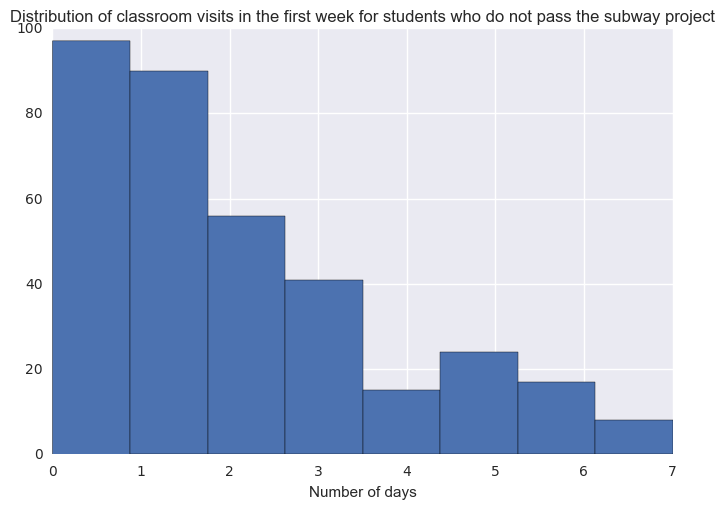

In [46]:
import seaborn as sns

plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

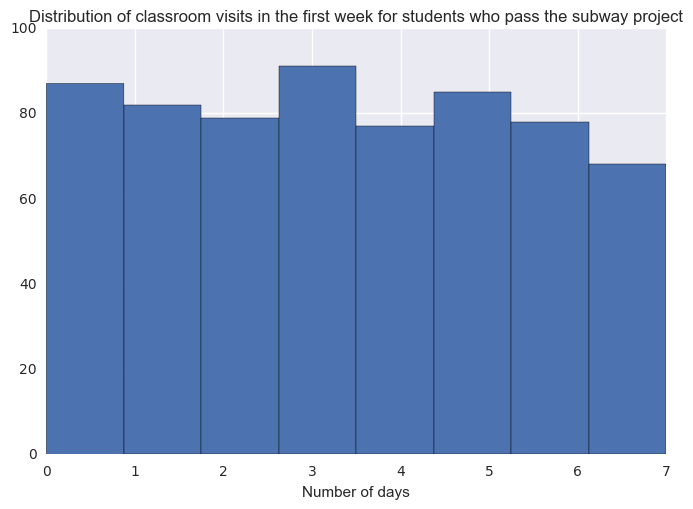

In [47]:
plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')